In [272]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
from scipy.fft import rfft, rfftfreq #fourier transformation package
import pywt

In [273]:
heated = ["25-1","25-2","25-3","250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
room_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
room_w = ["W-250-1","W-250-2","W-250-3","W-500-1","W-500-2","W-500-3","W-750-1","W-750-2","W-750-3","W-1000-1","W-1000-2","W-1000-3"]
sat_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
sat_w = ["W-250-1","W-250-2","W-250-3","W-500-1","W-500-2","W-500-3","W-750-1","W-750-2","W-750-3","W-1000-1","W-1000-2","W-1000-3"]

In [274]:
df = pd.read_csv("./CSV/Heated/25-1.csv", sep=r'\s*,\s*',engine='python')
df.drop(df.index[0:14],0,inplace=True)
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df.drop(df.index[0:2], inplace=True)
df = df.reset_index(drop=True)
df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
df

,ID,Date & Time,Measurement Type,Velocity [m/s],Time 1 [Âµs],Time 2 [Âµs],Distance [m],Crack Depth [m],Correction Factor,Ambient Temperature [Â°C],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,38223,9.5.2018 5:19:56,Direct (default),3866,26.9,0,0.104,0,1,32,...,99.8,99.8,-74.6,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,38222,9.5.2018 5:19:55,Direct (default),3895,26.7,0,0.104,0,1,32,...,99.8,99.8,-76.4,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,38221,9.5.2018 5:19:54,Direct (default),3852,27,0,0.104,0,1,32,...,99.8,99.8,-75.9,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,38220,9.5.2018 5:19:53,Direct (default),3895,26.7,0,0.104,0,1,32,...,99.8,99.8,-72.3,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,38219,9.5.2018 5:19:52,Direct (default),3881,26.8,0,0.104,0,1,32,...,99.8,99.8,-71.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,38218,9.5.2018 5:19:51,Direct (default),3866,26.9,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
6,38217,9.5.2018 5:19:50,Direct (default),3881,26.8,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,38216,9.5.2018 5:19:49,Direct (default),3881,26.8,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,38215,9.5.2018 5:19:48,Direct (default),3881,26.8,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
9,38214,9.5.2018 5:19:47,Direct (default),3969,26.2,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [275]:
df.sort_values("ID")
df

,ID,Date & Time,Measurement Type,Velocity [m/s],Time 1 [Âµs],Time 2 [Âµs],Distance [m],Crack Depth [m],Correction Factor,Ambient Temperature [Â°C],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,38223,9.5.2018 5:19:56,Direct (default),3866,26.9,0,0.104,0,1,32,...,99.8,99.8,-74.6,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,38222,9.5.2018 5:19:55,Direct (default),3895,26.7,0,0.104,0,1,32,...,99.8,99.8,-76.4,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,38221,9.5.2018 5:19:54,Direct (default),3852,27,0,0.104,0,1,32,...,99.8,99.8,-75.9,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,38220,9.5.2018 5:19:53,Direct (default),3895,26.7,0,0.104,0,1,32,...,99.8,99.8,-72.3,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,38219,9.5.2018 5:19:52,Direct (default),3881,26.8,0,0.104,0,1,32,...,99.8,99.8,-71.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,38218,9.5.2018 5:19:51,Direct (default),3866,26.9,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
6,38217,9.5.2018 5:19:50,Direct (default),3881,26.8,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,38216,9.5.2018 5:19:49,Direct (default),3881,26.8,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
8,38215,9.5.2018 5:19:48,Direct (default),3881,26.8,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
9,38214,9.5.2018 5:19:47,Direct (default),3969,26.2,0,0.104,0,1,32,...,99.8,99.8,99.8,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [276]:
w_size = (16,6) #waveform plot size
f_size = (16,8) #frequency plot size
time = np.arange(start=0, stop=199, step=0.5)

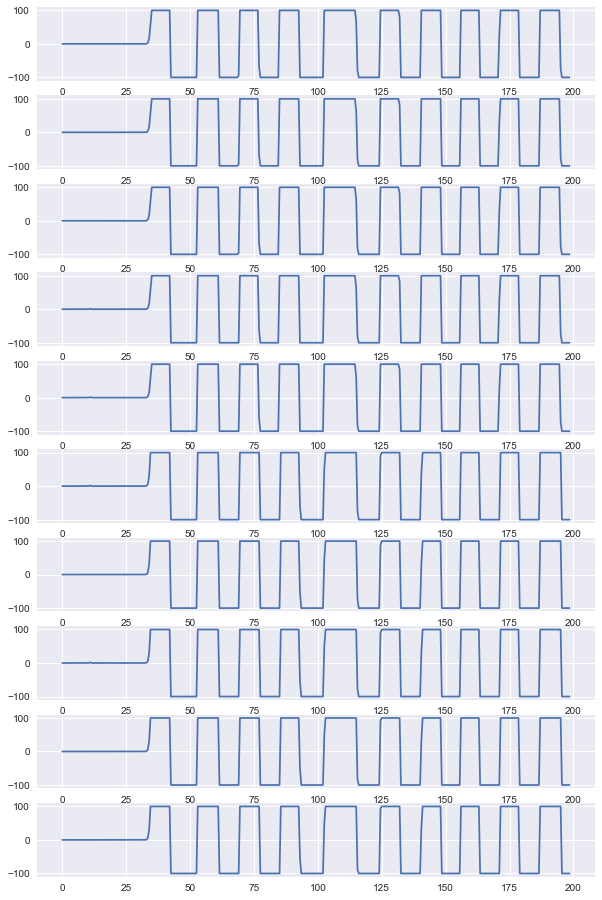

In [277]:
fig, axs = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs[i].plot(time, df.iloc[i, 21:].astype(float))

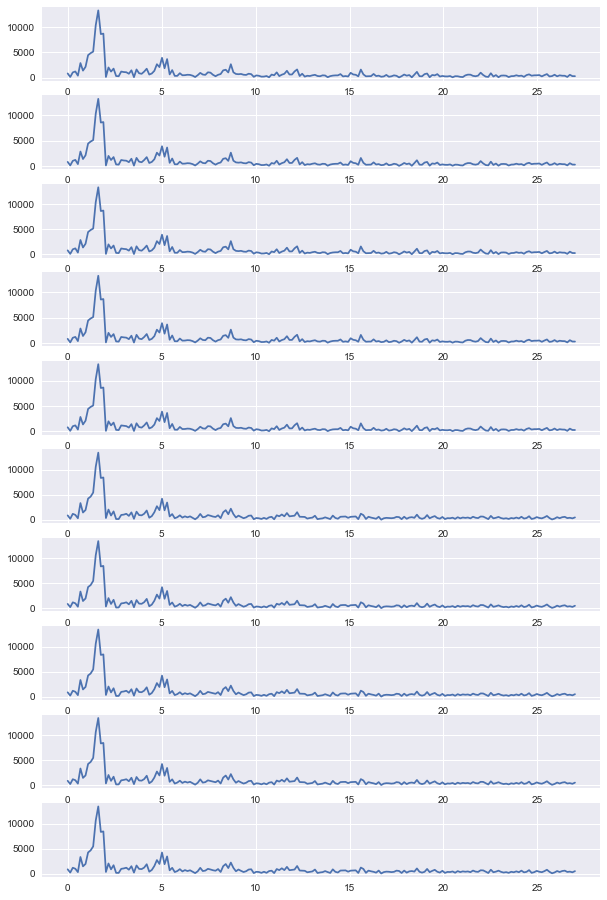

In [278]:
fig_f, axs_f = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs_f[i].plot(rfftfreq(len(df.iloc[i][21:]), 1/54), np.abs(rfft(df.iloc[i][21:])))

In [279]:
new_df = pd.DataFrame(columns = ['Type', 'Sub Type', 'Temperature', 'ID', 'Max Frequency', 'Mean Frequency', 'Centroid'])
new_df

,Type,Sub Type,Temperature,ID,Max Frequency,Mean Frequency,Centroid


In [280]:
for df_name in heated:
    df = pd.read_csv("./CSV/Heated/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
    df.drop(df.index[0:14],0,inplace=True)
    df = df.reset_index(drop=True)
    df.columns = df.iloc[0]
    df.drop(df.index[0:2], inplace=True)
    df = df.reset_index(drop=True)
    df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
    for i in df.index:
        freq = np.abs(rfft(df.iloc[i][21:]))
        amp = rfftfreq(len(df.iloc[i][21:]), 1/54)
        amp_sum = np.sum(amp)
        centroid_freq = 0.0
        for j in range(len(freq)):
            centroid_freq += freq[j]*amp[j]
        centroid_freq/=(amp_sum*1.0)
        new_df.loc[len(new_df.index)] = ['Heated', '', df_name[:-2], df['ID'][i], np.max(freq), np.mean(freq), centroid_freq]

In [281]:
for df_type in [room_b, room_w]:
    for df_name in df_type:
        sub_type = 'Brine' if df_name[0]=='B' else 'Water'
        df = pd.read_csv("./CSV/Room Temp/"+sub_type+"/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
        df.drop(df.index[0:14],0,inplace=True)
        df = df.reset_index(drop=True)
        df.columns = df.iloc[0]
        df.drop(df.index[0:2], inplace=True)
        df = df.reset_index(drop=True)
        df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
        for i in df.index:
            freq = np.abs(rfft(df.iloc[i][21:]))
            amp = rfftfreq(len(df.iloc[i][21:]), 1/54)
            centroid_freq = 0.0
            for j in range(len(freq)):
                centroid_freq += freq[j]*amp[j]
            centroid_freq/=np.sum(amp)
            new_df.loc[len(new_df.index)] = ['Heated', sub_type, df_name[2:-2], df['ID'][i], np.max(freq), np.mean(freq), centroid_freq]

In [282]:
new_df = new_df.sort_values('ID')
new_df = new_df.reset_index(drop=True)
new_df.to_csv("Fourier Frequencies.csv", index=False)

In [283]:
new_df

,Type,Sub Type,Temperature,ID,Max Frequency,Mean Frequency,Centroid
0,Heated,,25,38018,13017.758308,515.642954,191.355424
1,Heated,,25,38019,13107.175134,513.813407,190.086847
2,Heated,,25,38020,12916.045607,544.135598,211.259347
3,Heated,,25,38021,12757.375274,554.907646,218.020165
4,Heated,,25,38022,12766.082834,566.431613,225.401844
...,...,...,...,...,...,...,...
435,Heated,Water,1000,47369,8001.812431,501.815465,251.982463
436,Heated,Water,1000,47370,8004.747350,502.330115,252.943183
437,Heated,Water,1000,47371,8006.083649,502.315674,252.862845
438,Heated,Water,1000,47372,8009.115363,502.304882,252.848694


In [284]:
[coefficients, frequencies] = pywt.cwt(df.iloc[0][21:], np.arange(1, 399), 'mexh')